# 2. Imputation Techniques


### Numerical Imputation
- Mean, median, mode imputation (SimpleImputer)
- Constant-value imputation (Doesnot alter the existing data)
- KNN Imputation (KNNImputer)
- Iterative multivariate imputation (IterativeImputer)


## 2.1. Simple Imputer (Mean / Median / Mode)

**What it is:**
A basic imputation technique that fills missing values using a single summary statistic of the column.

---

**Mean Imputation**
- Replaces missing values with the column mean

**Use when:**
- Data is **numeric**
- Distribution is **approximately symmetric**
- Few missing values
- No extreme outliers

**Avoid when:**
- Data is **skewed**
- Outliers are present
- Preserving variance is important

---

**Median Imputation**
- Replaces missing values with the column median

**Use when:**
- Data is **numeric**
- Distribution is **skewed**
- Outliers exist
- Robustness is needed

**Avoid when:**
- Data has meaningful multimodal structure
- Very small datasets

---

**Mode Imputation**
- Replaces missing values with the most frequent value

**Use when:**
- Data is **categorical**
- Few missing values
- One category clearly dominates

**Avoid when:**
- Categories are evenly distributed
- Missingness may carry information

---

**Key limitation:**
> Simple imputers reduce variance and may introduce bias; use with caution in predictive models.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
"""
Use SimpleImputer if
- Missing value < 5%
- MCAR[Missing Completely At Random]
"""
tt=pd.read_csv(r"data/titanic_toy.csv")
tt.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
tt.shape

(891, 4)

In [5]:
tt.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
tt.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
age_mean=tt['Age'].mean()
age_median=tt['Age'].median()
age_mode=tt['Age'].mode()

fare_mean=tt["Fare"].mean()
fare_median=tt["Fare"].median()
fare_mode=tt["Fare"].mode()


In [8]:
df_tt=tt.copy()

In [9]:
df_tt["Age_mean"]=df_tt["Age"].fillna(age_mean)
df_tt["Age_median"]=df_tt["Age"].fillna(age_median)
df_tt["Age_mode"]=df_tt["Age"].fillna(age_mode[0])

df_tt["Fare_mean"]=df_tt["Fare"].fillna(fare_mean)
df_tt["Fare_median"]=df_tt["Fare"].fillna(fare_median)
df_tt["Fare_mode"]=df_tt["Fare"].fillna(fare_mode[0])

In [10]:
df_tt.sample(10)

,Age,Fare,Family,Survived,Age_mean,Age_median,Age_mode,Fare_mean,Fare_median,Fare_mode
655,24.0,73.5000,2,0,24.000000,24.0,24.0,73.5000,73.5000,73.5000
163,17.0,8.6625,0,0,17.000000,17.0,17.0,8.6625,8.6625,8.6625
819,10.0,27.9000,5,0,10.000000,10.0,10.0,27.9000,27.9000,27.9000
253,30.0,16.1000,1,0,30.000000,30.0,30.0,16.1000,16.1000,16.1000
572,36.0,26.3875,0,1,36.000000,36.0,36.0,26.3875,26.3875,26.3875
483,63.0,9.5875,0,1,63.000000,63.0,63.0,9.5875,9.5875,9.5875
762,20.0,7.2292,0,1,20.000000,20.0,20.0,7.2292,7.2292,7.2292
650,NaN,7.8958,0,0,29.699118,28.0,24.0,7.8958,7.8958,7.8958
561,40.0,7.8958,0,0,40.000000,40.0,40.0,7.8958,7.8958,7.8958
766,NaN,39.6000,0,0,29.699118,28.0,24.0,39.6000,39.6000,39.6000


In [11]:
# Calculate variances for original Age and Fare (ignoring NaNs)
original_age_var = tt["Age"].var(skipna=True)
original_fare_var = tt["Fare"].var(skipna=True)

# Calculate variances for imputed columns
age_mean_var = df_tt["Age_mean"].var()
age_median_var = df_tt["Age_median"].var()
age_mode_var = df_tt["Age_mode"].var()

fare_mean_var = df_tt["Fare_mean"].var()
fare_median_var = df_tt["Fare_median"].var()
fare_mode_var = df_tt["Fare_mode"].var()

# Print the variances
print(f"Original Age Variance: {original_age_var}")
print(f"Age Mean Imputed Variance: {age_mean_var}")
print(f"Age Median Imputed Variance: {age_median_var}")
print(f"Age Mode Imputed Variance: {age_mode_var}")
print("-"*50)
print(f"Original Fare Variance: {original_fare_var}")
print(f"Fare Mean Imputed Variance: {fare_mean_var}")
print(f"Fare Median Imputed Variance: {fare_median_var}")
print(f"Fare Mode Imputed Variance: {fare_mode_var}")

Original Age Variance: 211.01912474630802
Age Mean Imputed Variance: 169.0523999372108
Age Median Imputed Variance: 169.51249827942345
Age Mode Imputed Variance: 174.22869485188968
--------------------------------------------------
Original Fare Variance: 2530.6730768999514
Fare Mean Imputed Variance: 2402.717696607258
Fare Median Imputed Variance: 2417.971599672527
Fare Mode Imputed Variance: 2430.9014138846615


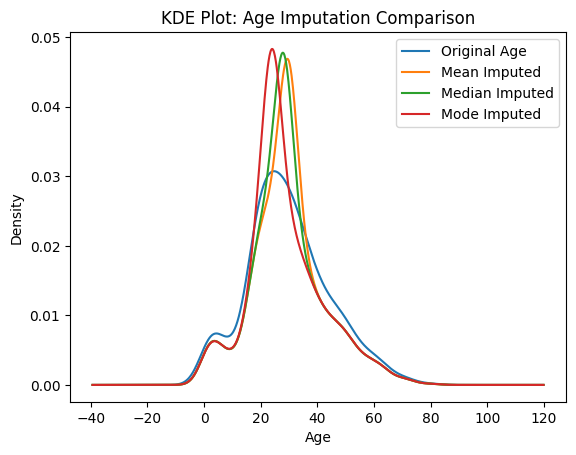

In [12]:
import matplotlib.pyplot as plt

tt["Age"].plot(kind="kde", label="Original Age")
df_tt["Age_mean"].plot(kind="kde", label="Mean Imputed")
df_tt["Age_median"].plot(kind="kde", label="Median Imputed")
df_tt["Age_mode"].plot(kind="kde", label="Mode Imputed")

plt.legend()
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE Plot: Age Imputation Comparison")
plt.show()


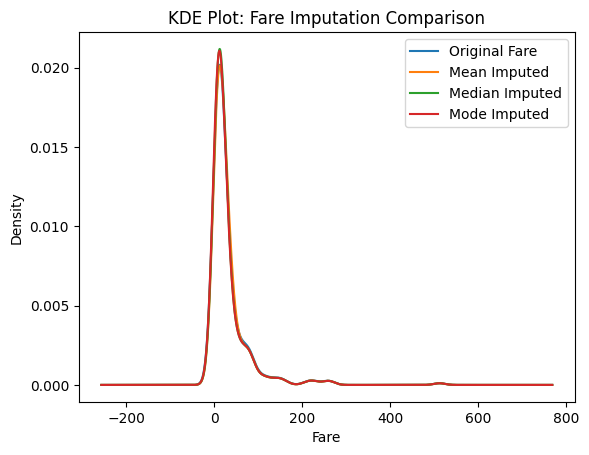

In [13]:
tt["Fare"].plot(kind="kde", label="Original Fare")
df_tt["Fare_mean"].plot(kind="kde", label="Mean Imputed")
df_tt["Fare_median"].plot(kind="kde", label="Median Imputed")
df_tt["Fare_mode"].plot(kind="kde", label="Mode Imputed")

plt.legend()
plt.xlabel("Fare")
plt.ylabel("Density")
plt.title("KDE Plot: Fare Imputation Comparison")
plt.show()


<Axes: >

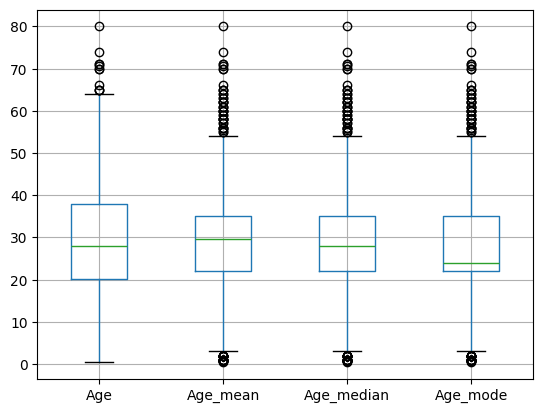

In [14]:
df_tt[["Age", "Age_mean", "Age_median", "Age_mode"]].boxplot()

<Axes: >

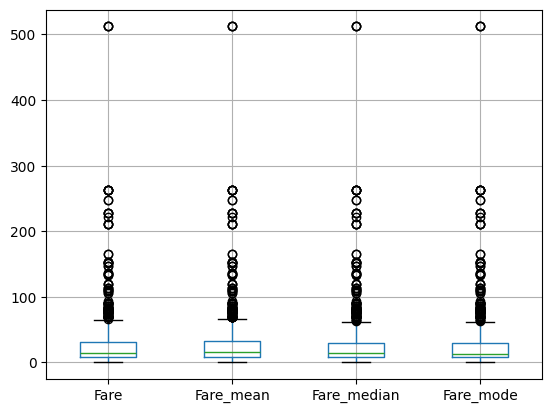

In [15]:
df_tt[["Fare","Fare_mean", "Fare_median", "Fare_mode"]].boxplot()

### Constant Imputer

**What it is:**
Replaces missing values with a fixed constant (e.g., `0`, `-1`, `"Unknown"`), making missingness explicit.

---

**Use when (with reasons):**
- **Missingness is informative**  
  → The absence itself carries meaning (e.g., no previous loan, not applicable).
- **Need an explicit “missing” category**  
  → Prevents losing information by separating missing values from valid categories.
- **Categorical features**  
  → `"Unknown"` avoids forcing a category guess.
- **Tree-based models (RF, XGBoost)**  
  → Trees can split on the constant without assuming linear relationships.

---

**Avoid when (with reasons):**
- **Constant has real meaning**  
  → `0` or `-1` may be interpreted as a valid value, causing confusion.
- **Linear or distance-based models**  
  → Constants distort distances and bias coefficients.
- **Highly skewed numeric data**  
  → Artificially creates spikes that mislead the model.

---

**Best practice:**
> Use a constant **outside the valid range** and add a **missing-indicator column** when possible.



### KNN Imputer

**What it is:**
Imputes missing values using the average (or majority vote) of the *k nearest samples* based on feature similarity.

---

**Use when (with reasons):**
- **Data has meaningful similarity structure**  
  → Nearby samples tend to have similar values.
- **Missing values follow patterns**  
  → KNN captures local relationships better than global statistics.
- **Dataset size is small to medium**  
  → Distance computation is manageable.
- **Features are scaled**  
  → Prevents large-range features from dominating distance.

---

**Avoid when (with reasons):**
- **Very large datasets**  
  → Distance computation is slow (approximately O(n²)).
- **High-dimensional data**  
  → Neighbors become unreliable (curse of dimensionality).
- **Unscaled features**  
  → Distance metric becomes misleading.
- **Columns with many missing values**  
  → Insufficient information to find good neighbors.

---

**Key limitations:**
- Computationally expensive  
- Sensitive to scaling  
- Not ideal for categorical data

---

**Rule of thumb:**
> Use KNN Imputer when local similarity matters and data size is manageable; avoid it for large, high-dimensional, or poorly scaled datasets.


In [16]:
from sklearn.impute import KNNImputer

tt=pd.read_csv(r"data/titanic_toy.csv")
tt.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [17]:
tt.sample(10, random_state=42)

,Age,Fare,Family,Survived
709,NaN,15.2458,2,1
439,31.0,10.5000,0,0
840,20.0,7.9250,0,0
720,6.0,33.0000,1,1
39,14.0,11.2417,1,1
290,26.0,78.8500,0,1
300,NaN,7.7500,0,1
333,16.0,18.0000,2,0
208,16.0,7.7500,0,1
136,19.0,26.2833,2,1


In [18]:
imputer= KNNImputer(n_neighbors=3)
tt_imputed=imputer.fit_transform(tt)
tt=pd.DataFrame(tt_imputed, columns=tt.columns)

In [19]:
tt.loc[300]

Age         35.666667
Fare         7.750000
Family       0.000000
Survived     1.000000
Name: 300, dtype: float64

In [20]:
tt["Age"].apply(np.floor).sample(10)

687    19.0
562    28.0
616    34.0
305     0.0
84     17.0
119     2.0
570    62.0
648    25.0
514    24.0
679    36.0
Name: Age, dtype: float64

### Categorical Imputation

- **Most frequent value (Mode Imputation)**  
  Replaces missing values with the most common category.  
  **Use when:** One category clearly dominates and missing values are few.  
  **Avoid when:** Categories are evenly distributed or missingness is informative.

- **“Unknown” category (Constant Imputation)**  
  Fills missing values with a special category like `"Unknown"`.  
  **Use when:** Missingness itself is meaningful or you want to preserve all rows.  
  **Avoid when:** `"Unknown"` could be confused with real categories or mislead models sensitive to category frequency.



In [21]:
"""
MCAR
Missing value < 5%
use the most frequent value
"""
dt= pd.read_csv(r"data/train.csv")
dt=dt[["GarageQual", "FireplaceQu", "SalePrice"]]

In [22]:
dt.sample(10)

,GarageQual,FireplaceQu,SalePrice
895,TA,TA,140000
531,TA,NaN,128000
858,TA,TA,152000
513,TA,NaN,134000
218,TA,TA,311500
1246,TA,NaN,186500
210,NaN,NaN,98000
334,TA,TA,192000
1044,TA,Gd,278000
1247,TA,NaN,169900


In [23]:
dt.shape

(1460, 3)

In [24]:
dt.isnull().mean()

GarageQual     0.055479
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [25]:
dt["GarageQual"].isnull().sum()

np.int64(81)

Text(0, 0.5, 'Number of Houses')

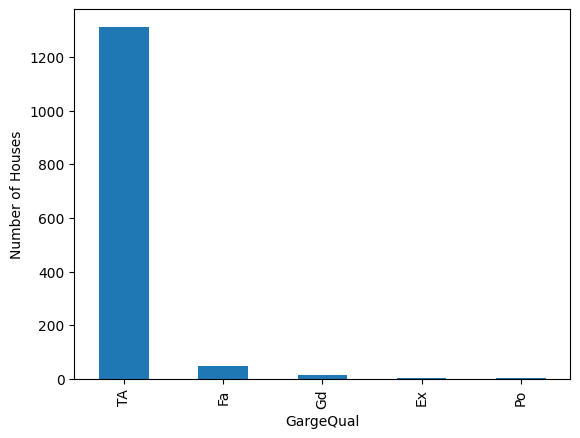

In [26]:
dt["GarageQual"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GargeQual")
plt.ylabel("Number of Houses")

In [27]:
dt["GarageQual"].mode()

0    TA
Name: GarageQual, dtype: object

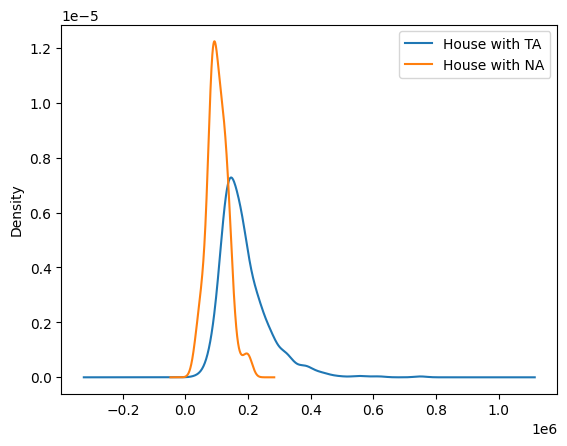

In [28]:
dt[dt['GarageQual']=='TA']['SalePrice'].plot(kind="kde", label="House with TA")
dt[dt['GarageQual'].isnull()]['SalePrice'].plot(kind="kde", label="House with NA")
plt.legend()

In [29]:
temp=dt[dt['GarageQual']=='TA']['SalePrice']
dt["GarageQual"]=dt["GarageQual"].fillna('TA')

Text(0, 0.5, 'Number of Houses')

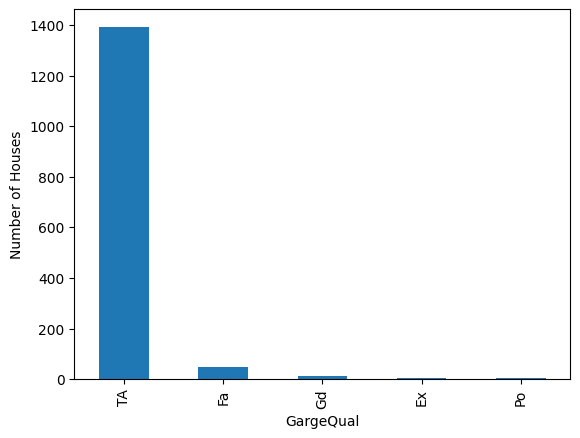

In [30]:
dt["GarageQual"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GargeQual")
plt.ylabel("Number of Houses")

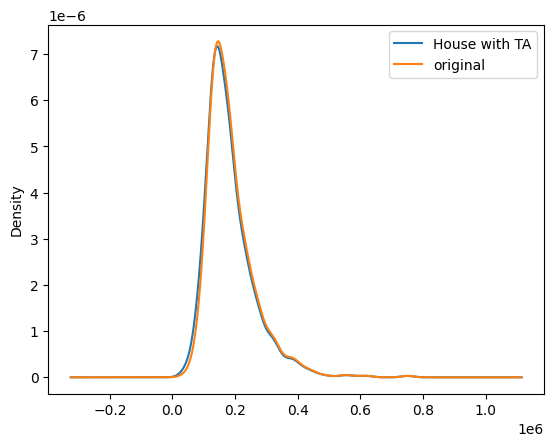

In [31]:
dt[dt['GarageQual']=='TA']['SalePrice'].plot(kind="kde", label="House with TA")
temp.plot(kind='kde', label='original')
plt.legend()

In [32]:
dt["FireplaceQu"].isnull().sum()

np.int64(690)

<Axes: xlabel='FireplaceQu'>

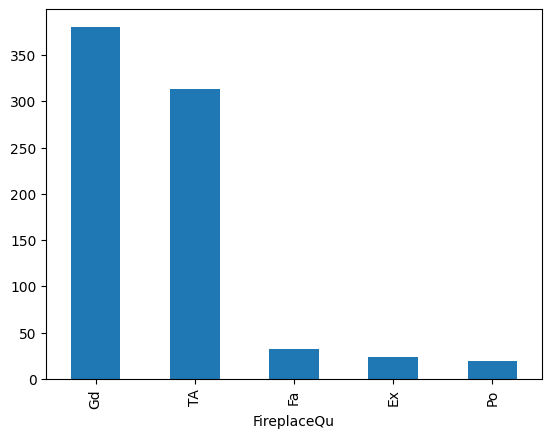

In [33]:
dt["FireplaceQu"].value_counts().sort_values(ascending=False).plot.bar()

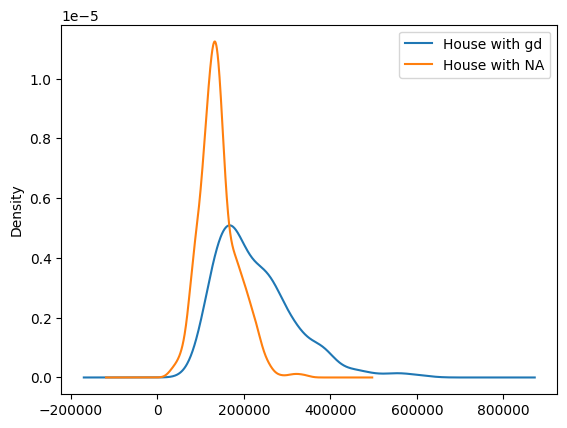

In [34]:
dt[dt['FireplaceQu']=='Gd']['SalePrice'].plot(kind="kde", label="House with gd")
dt[dt['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde", label="House with NA")
plt.legend()

In [35]:
temp=dt[dt['FireplaceQu']=='Gd']['SalePrice']
dt["FireplaceQu"]=dt["FireplaceQu"].fillna('Gd')

<Axes: xlabel='FireplaceQu'>

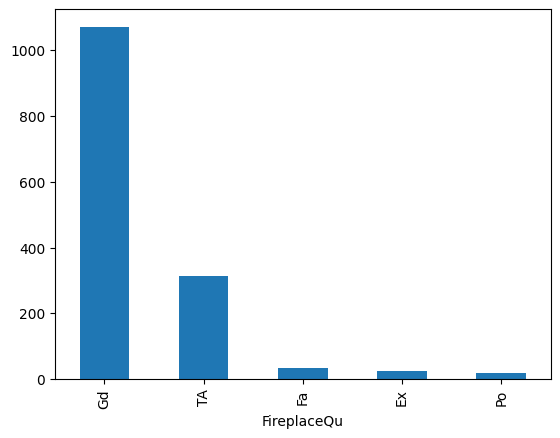

In [36]:
dt["FireplaceQu"].value_counts().sort_values(ascending=False).plot.bar()

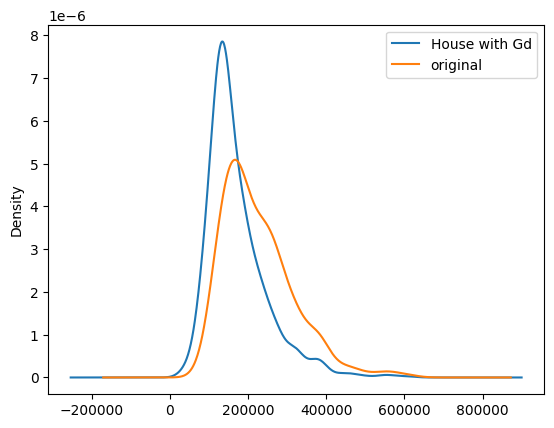

In [37]:
dt[dt['FireplaceQu']=='Gd']['SalePrice'].plot(kind="kde", label="House with Gd")
temp.plot(kind='kde', label='original')
plt.legend()

In [38]:
tt=pd.read_csv(r"data/titanic_toy.csv")
tt.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [39]:
tt["Imputed_Age"]=tt["Age"]
# Number of missing Age values
n_missing = tt["Age"].isnull().sum()

# Randomly sample non-null Age values
sampled_ages = tt["Age"].dropna().sample(n_missing).values

# Assign using .loc
tt.loc[tt["Age"].isnull(), "Imputed_Age"] = sampled_ages


In [40]:
tt

,Age,Fare,Family,Survived,Imputed_Age
0,22.0,7.2500,1,0,22.0
1,38.0,71.2833,1,1,38.0
2,26.0,7.9250,0,1,26.0
3,35.0,53.1000,1,1,35.0
4,35.0,8.0500,0,0,35.0
...,...,...,...,...,...
886,27.0,13.0000,0,0,27.0
887,19.0,30.0000,0,1,19.0
888,NaN,23.4500,3,0,25.0
889,26.0,NaN,0,1,26.0


### Iterative Imputer / MICE (Multivariate Imputation by Chained Equations)

**What it is:**  
A sophisticated method for imputing missing data where each feature with missing values is modeled as a function of the other features, iteratively predicting missing entries.

---

**Key points:**  
- **MAR (Missing at Random):** Works best when missingness depends on other observed variables, not completely random.  
- **Accurate:** Produces better estimates than simple mean/median/mode, because it uses relationships between features.  
- **Computationally expensive:** Iterative modeling requires multiple passes over the dataset and fitting models for each column.

---

**Steps (simplified):**  
1. **Initial imputation:** Fill missing values with simple statistics like the mean.  
2. **Iterative prediction:** For each column with missing values:  
   - Treat it as the target  
   - Use other columns as predictors  
   - Predict missing values  
3. **Update & check difference:** Subtract new predicted values from the previous iteration to check change.  
4. **Repeat:** Iterate step 2–3 for all columns until changes at missing entries are minimal or a set number of iterations is reached.  

---

**Why it works:**  
By modeling each column using other columns, MICE preserves multivariate relationships in the data rather than ignoring dependencies (as simple imputers do).

---

**When to use:**  
- Missing values are dependent on other features (MAR)  
- You need more accurate imputations than mean/median/mode  
- Dataset size is manageable (not too big)

**When not to use:**  
- Very large datasets (too slow)  
- Missing completely at random (MCAR) – simpler methods suffice  
- High-dimensional data with many missing columns – models may be unstable


### Time-Series Imputation

- **Forward Fill (ffill)**  
  Replaces missing values with the **last observed value**.  
  **Use when:** Values are expected to persist over time (e.g., stock prices, sensor readings).  
  **Avoid when:** Sudden changes are common; can propagate outdated values.

- **Backward Fill (bfill)**  
  Replaces missing values with the **next observed value**.  
  **Use when:** Future values can reasonably represent missing past values.  
  **Avoid when:** Can introduce unrealistic predictions if values change rapidly.

- **Linear Interpolation**  
  Fills missing values by **linearly estimating** between neighboring points.  
  **Use when:** Values change gradually and smoothly over time.  
  **Avoid when:** Data has abrupt jumps or non-linear patterns; interpolation may be misleading.


In [41]:
data = {'date': pd.date_range(start='2025-01-01', periods=6, freq='D'),
        'value': [10, np.nan, np.nan, 25, np.nan, 30]}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

In [42]:
df

,value
date,
2025-01-01,10.0
2025-01-02,NaN
2025-01-03,NaN
2025-01-04,25.0
2025-01-05,NaN
2025-01-06,30.0


In [ ]:
df["Bfill_value"]=df["value"].bfill()
# df["Bfill_value"]=df["value"].fillna(method="bfill")

In [46]:
df["Ffill_value"]=df["value"].ffill()
# df["Ffill_value"]=df["value"].fillna(method="ffill")

In [47]:
df

,value,Bfill_value,Ffill_value
date,,,
2025-01-01,10.0,10.0,10.0
2025-01-02,NaN,25.0,10.0
2025-01-03,NaN,25.0,10.0
2025-01-04,25.0,25.0,25.0
2025-01-05,NaN,30.0,25.0
2025-01-06,30.0,30.0,30.0


In [48]:
df["interpolate_value"]=df["value"].interpolate(method="linear")
df

,value,Bfill_value,Ffill_value,interpolate_value
date,,,,
2025-01-01,10.0,10.0,10.0,10.0
2025-01-02,NaN,25.0,10.0,15.0
2025-01-03,NaN,25.0,10.0,20.0
2025-01-04,25.0,25.0,25.0,25.0
2025-01-05,NaN,30.0,25.0,27.5
2025-01-06,30.0,30.0,30.0,30.0


methods:{linear, polynomial, time, nearest, zero, slinear, quadratic, cubic, barycentric, krogh, spline, pchip }